In [1]:
#import library package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Data_Tanaman_Padi_Sumatera_version_1.csv')
data

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.00,323589.00,1627.0,82.00,26.06
1,Aceh,1994,1299699.00,329041.00,1521.0,82.12,26.92
2,Aceh,1995,1382905.00,339253.00,1476.0,82.72,26.27
3,Aceh,1996,1419128.00,348223.00,1557.0,83.00,26.08
4,Aceh,1997,1368074.00,337561.00,1339.0,82.46,26.31
...,...,...,...,...,...,...,...
219,Lampung,2016,3831923.00,390799.00,2317.6,79.40,26.45
220,Lampung,2017,4090654.00,396559.00,1825.1,77.04,26.36
221,Lampung,2018,2488641.91,511940.93,1385.8,76.05,25.50
222,Lampung,2019,2164089.33,464103.42,1706.4,78.03,27.23


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB


In [5]:
#Data Analisis Eksplorasi

data.isnull().sum()

Provinsi          0
Tahun             0
Produksi          0
Luas Panen        0
Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
dtype: int64

In [6]:
data.describe()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


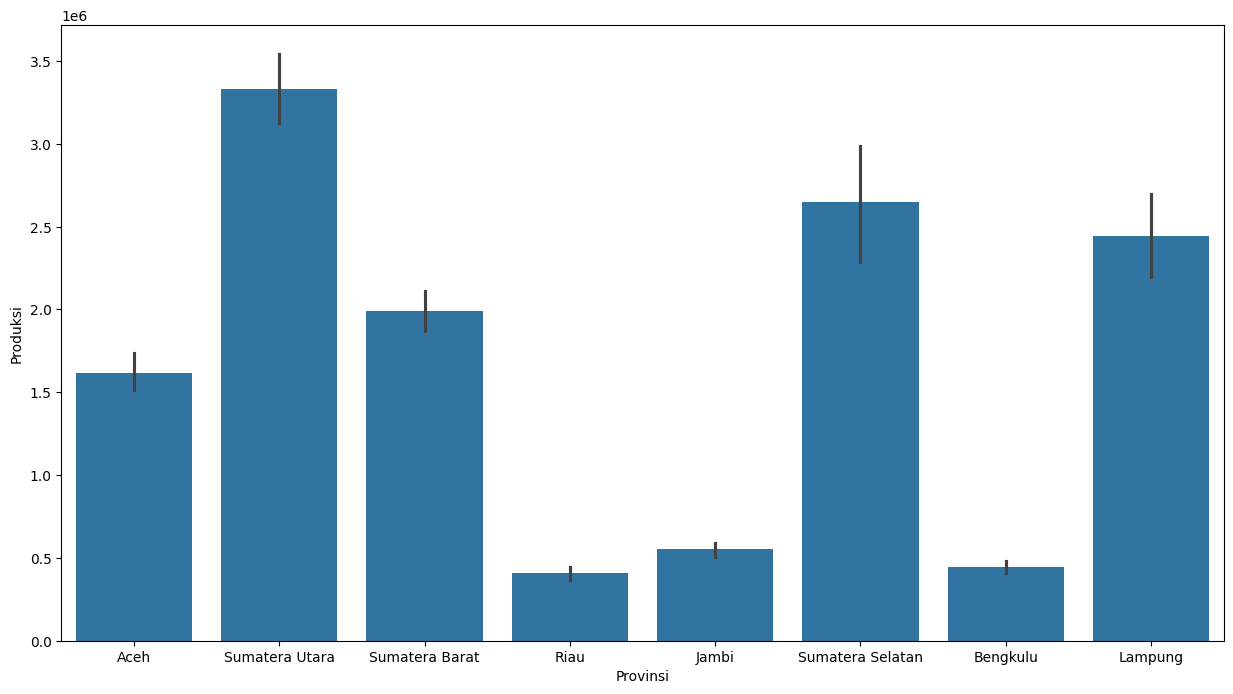

In [10]:
plt.figure(figsize=(15,8))
sns.barplot(x=data['Provinsi'], y=data['Produksi'])
plt.show()

In [11]:
pd.pivot_table(data,index=['Provinsi'],values=['Produksi'], aggfunc=np.mean)

,Produksi
Provinsi,
Aceh,1.618737e+06
Bengkulu,4.449648e+05
Jambi,5.528638e+05
Lampung,2.444068e+06
Riau,4.074645e+05
Sumatera Barat,1.990396e+06
Sumatera Selatan,2.648643e+06
Sumatera Utara,3.330471e+06


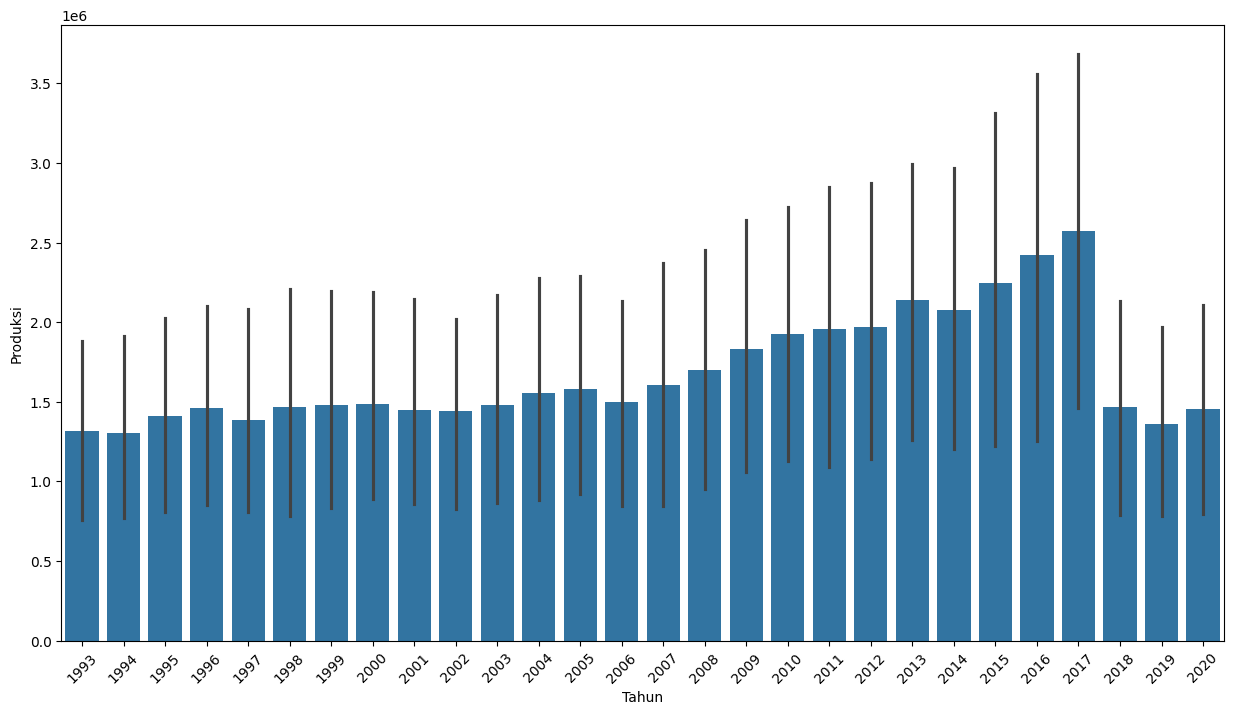

In [15]:
plt.figure(figsize=(15,8))
sns.barplot(x='Tahun', y='Produksi', data=data)
plt.xticks(rotation=45)
plt.show()


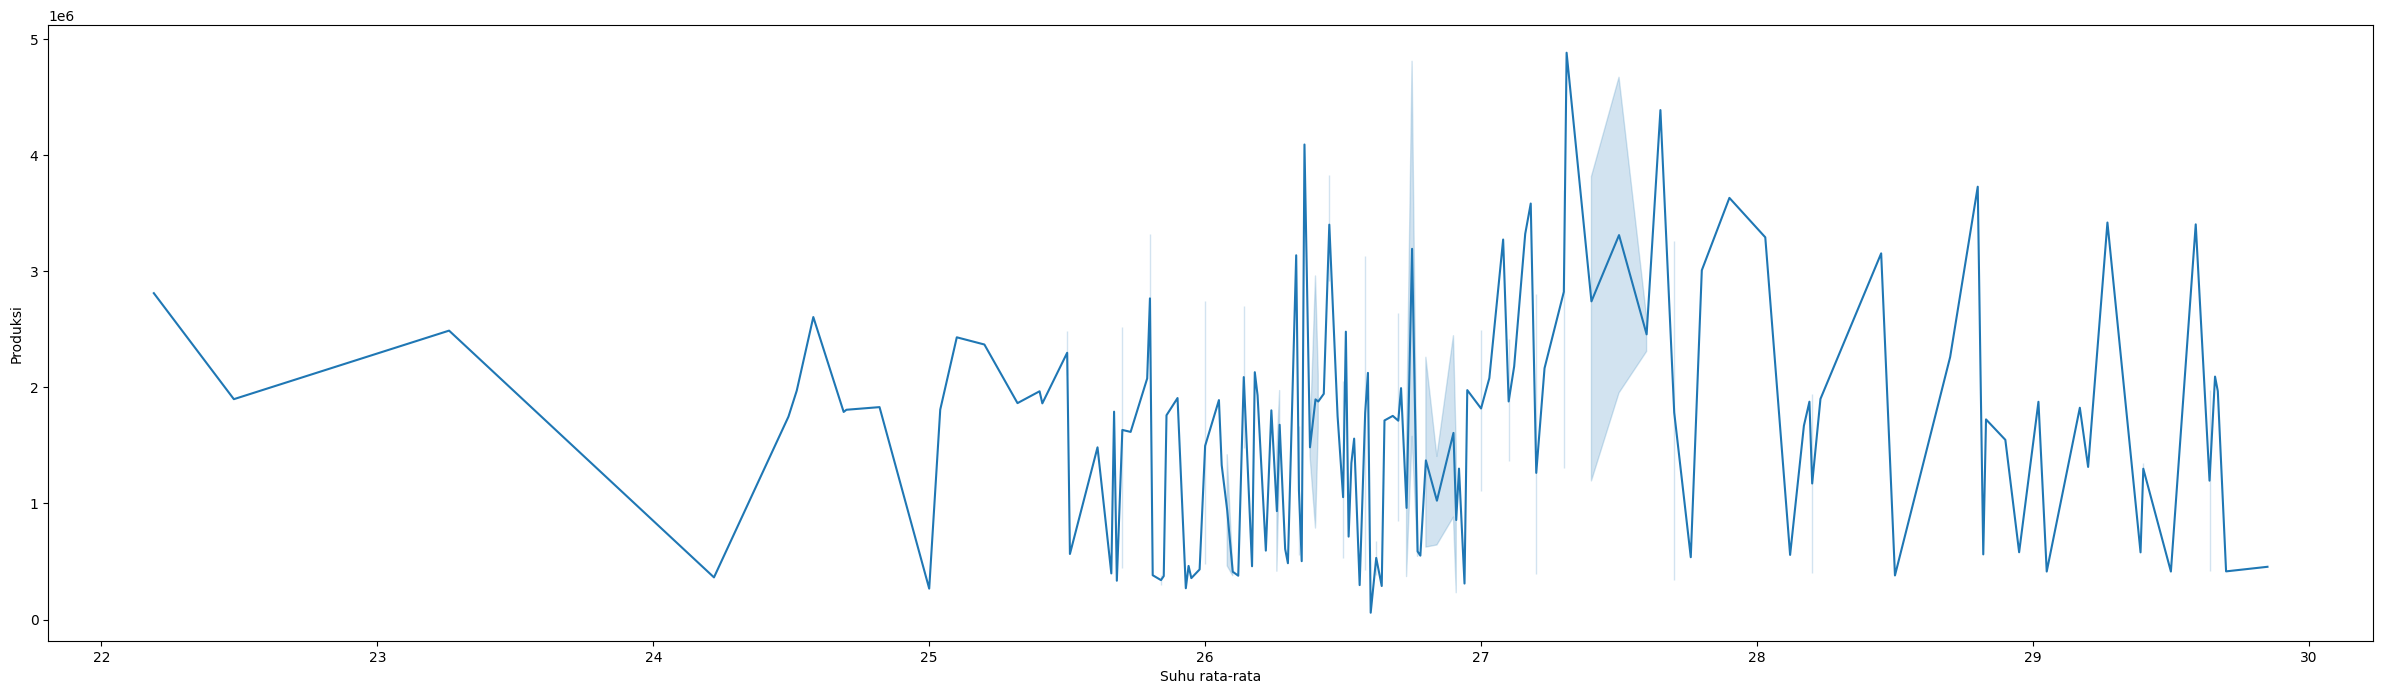

In [18]:
plt.figure(figsize=(30,8))
sns.lineplot(x=data['Suhu rata-rata'], y=data['Produksi'])
plt.show()

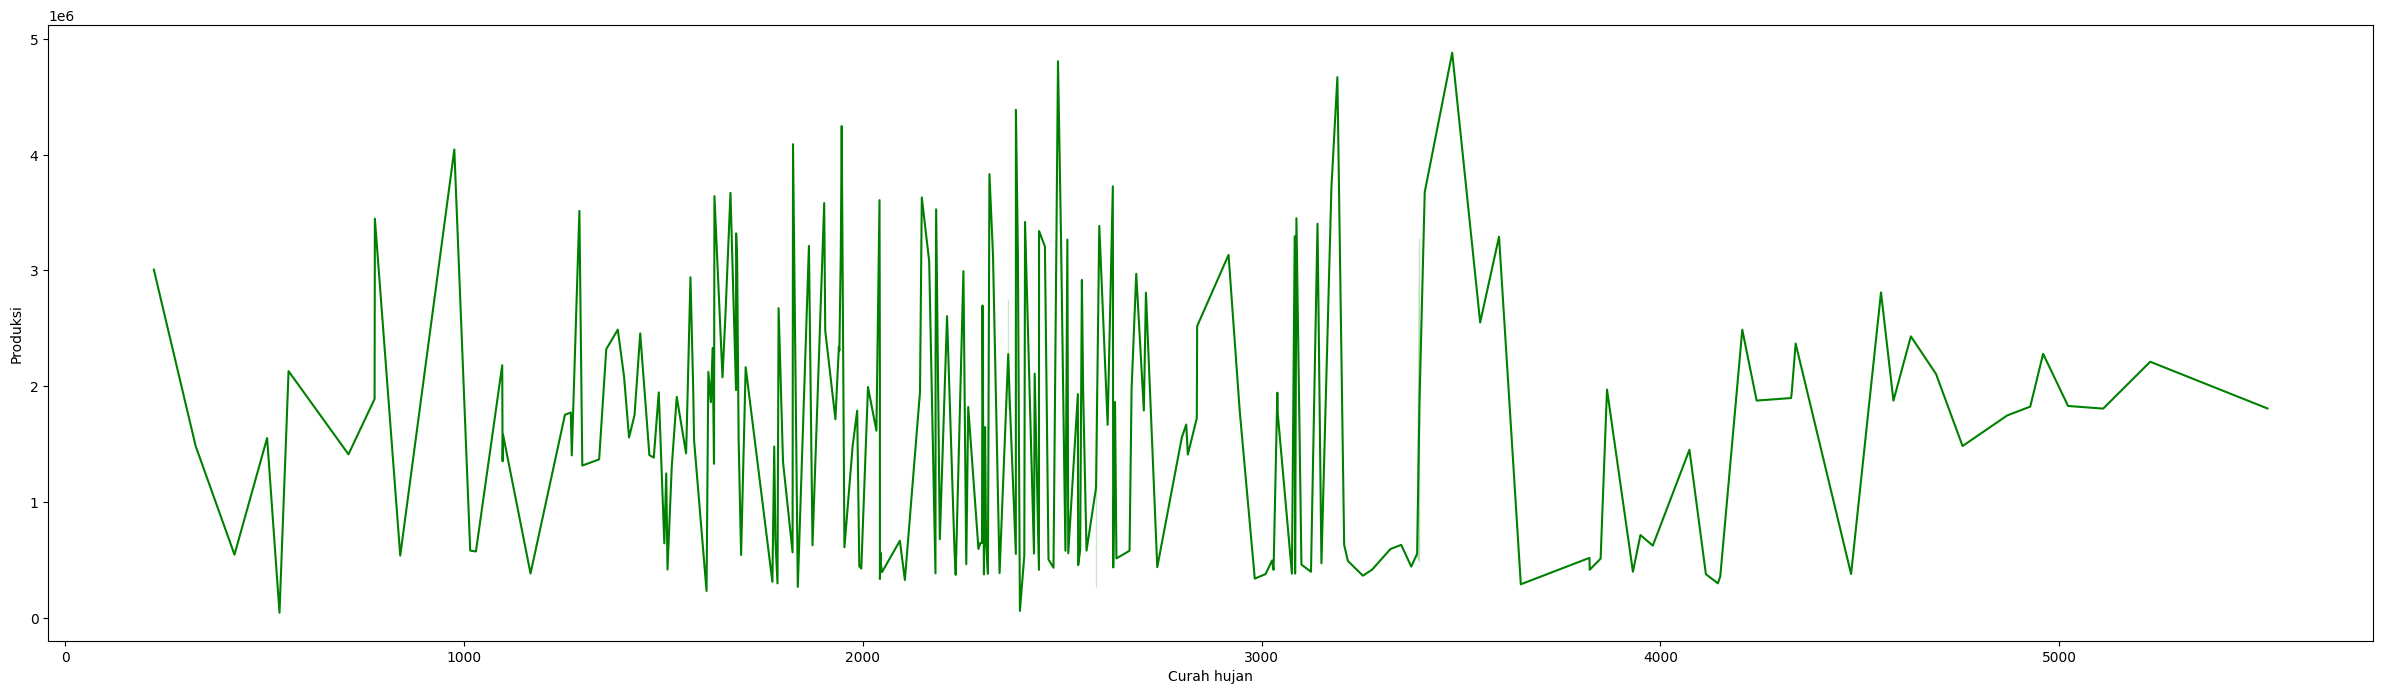

In [20]:
plt.figure(figsize=(30,8))
sns.lineplot(x=data['Curah hujan'],y=data["Produksi"], color='green')
plt.show()

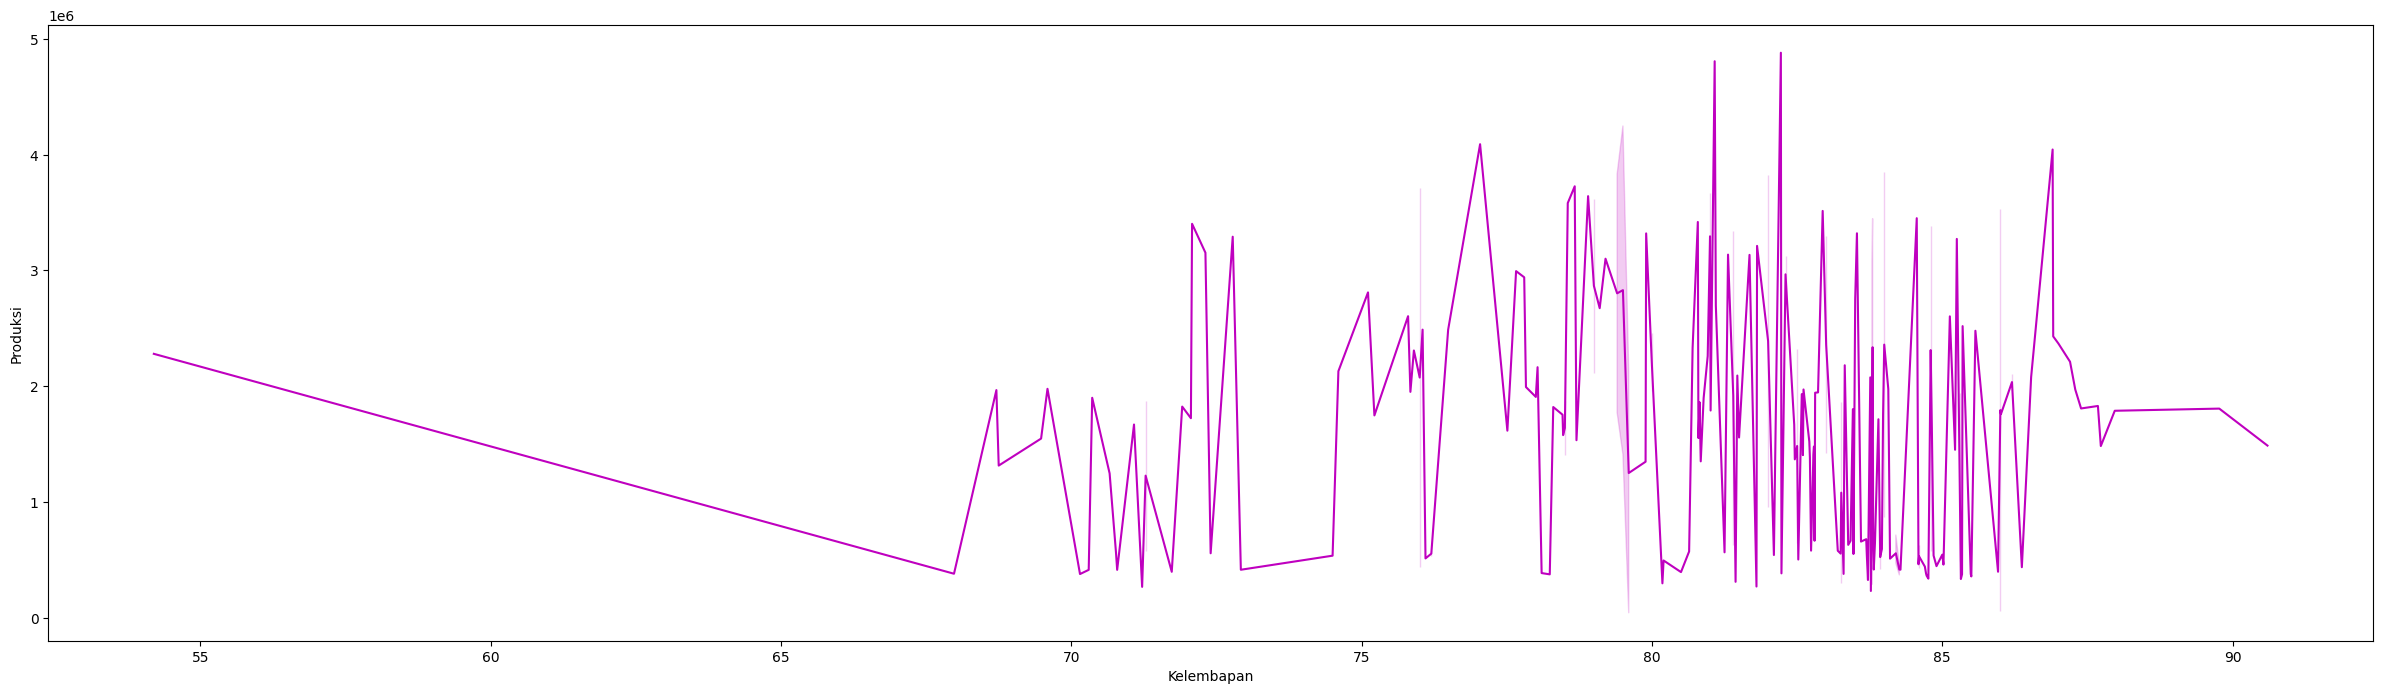

In [21]:
plt.figure(figsize=(30,8))
sns.lineplot(x=data['Kelembapan'],y=data['Produksi'], color='m')
plt.show()

In [26]:
# A. Distribusi jumlah produksi

#statistical plot
import scipy.stats as stats
import pylab as py

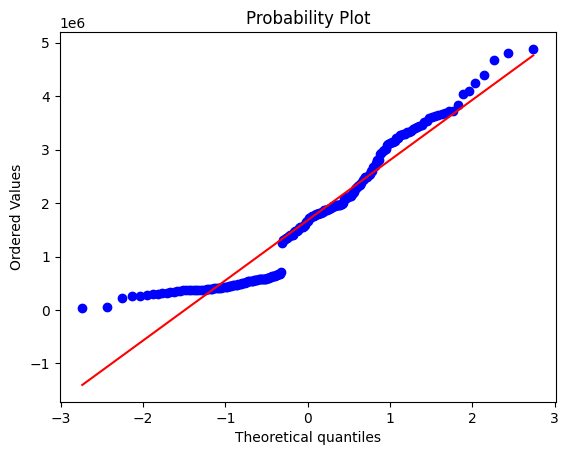

In [27]:
stats.probplot(data['Produksi'], dist='norm', plot=py)
py.show()

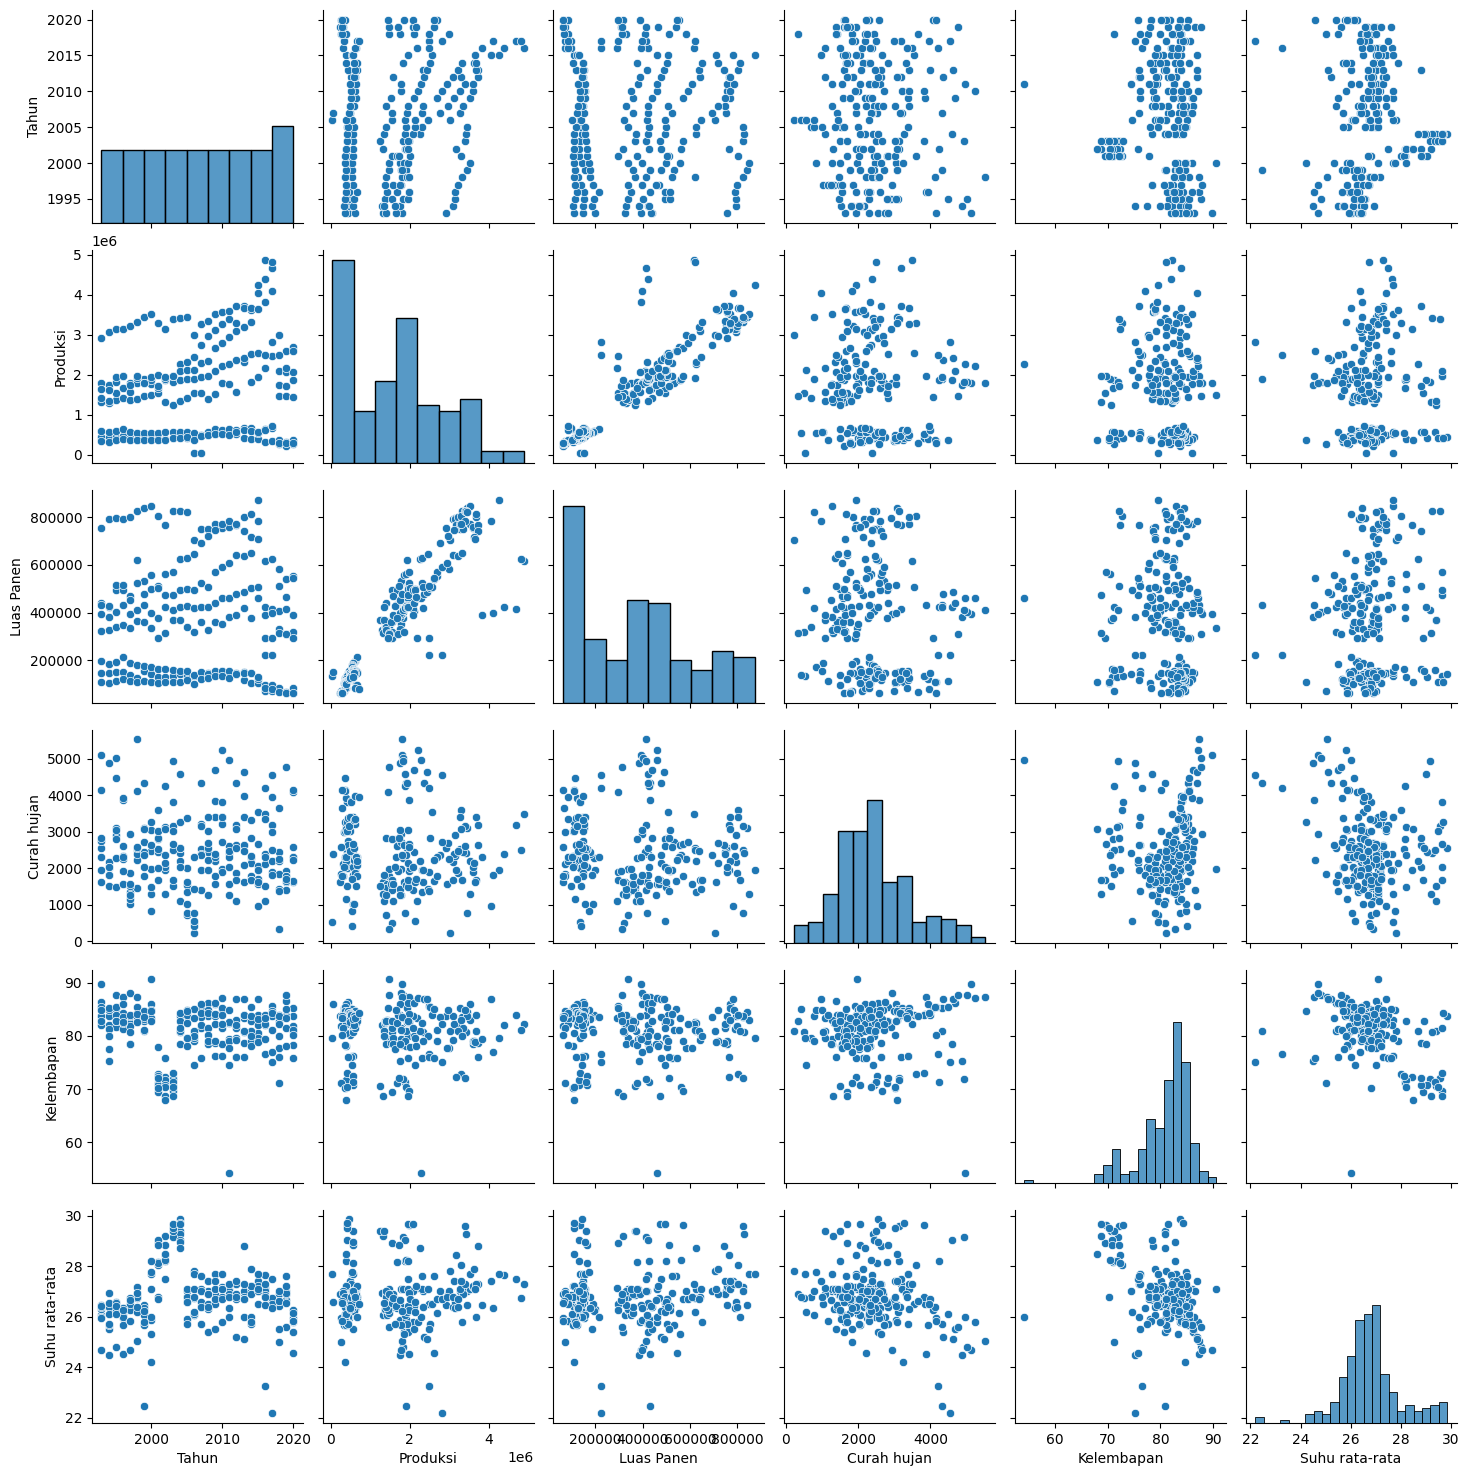

In [28]:
sns.pairplot(data)

<Axes: >

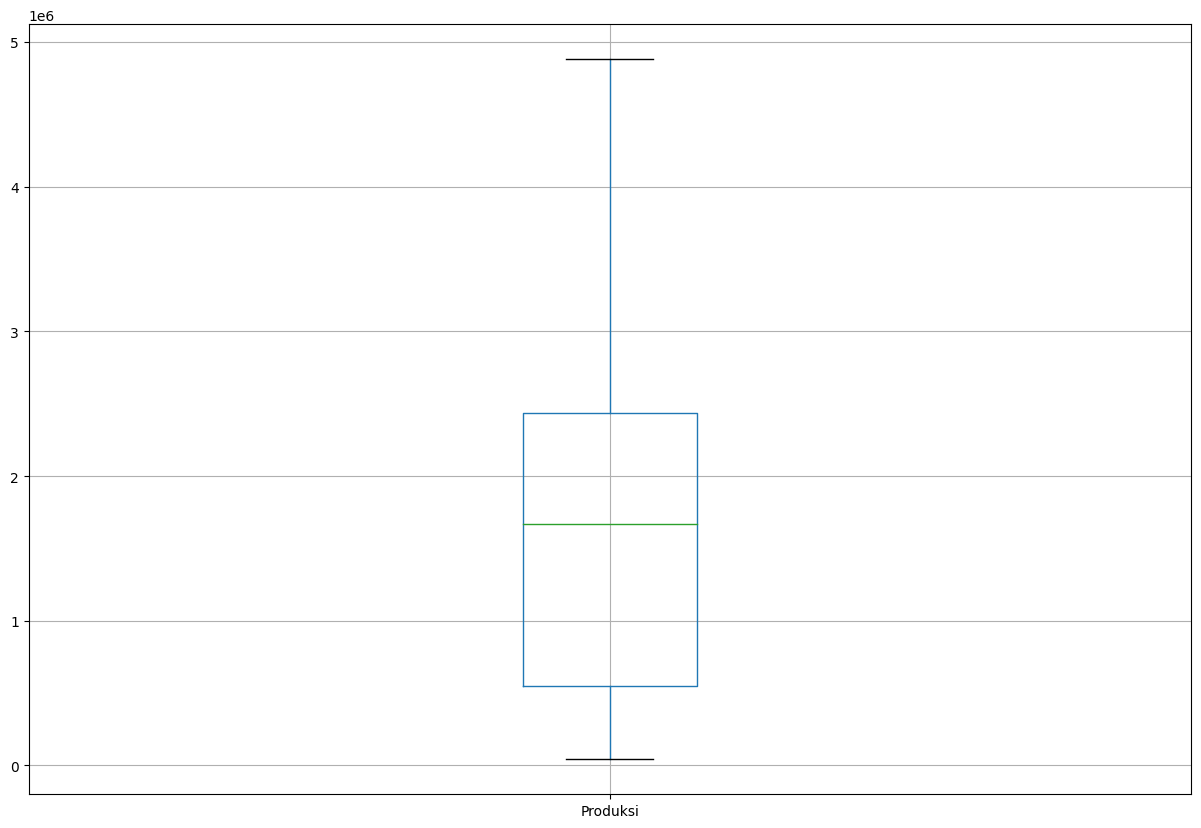

In [30]:
# B. Memeriksa Keanehan

data[['Produksi']].boxplot(figsize=(15,10))

In [31]:
# C. Matriks Korelasi antar variabel numerik

data.columns

Index(['Provinsi', 'Tahun', 'Produksi', 'Luas Panen', 'Curah hujan',
       'Kelembapan', 'Suhu rata-rata'],
      dtype='object')

In [32]:
#ubah urutan kolom
cols = list(data.columns)

df = data.copy()
df = df[cols[0:2] + cols[3:7] + [cols[2]]]
df.tail()

,Provinsi,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi
219,Lampung,2016,390799.00,2317.6,79.40,26.45,3831923.00
220,Lampung,2017,396559.00,1825.1,77.04,26.36,4090654.00
221,Lampung,2018,511940.93,1385.8,76.05,25.50,2488641.91
222,Lampung,2019,464103.42,1706.4,78.03,27.23,2164089.33
223,Lampung,2020,545149.05,2211.3,75.80,24.58,2604913.29


In [33]:
df.corr()

<ipython-input-33-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi
Tahun,1.000000,-0.045951,-0.047645,-0.033474,0.004923,0.182527
Luas Panen,-0.045951,1.000000,-0.092975,-0.061121,0.115726,0.905622
Curah hujan,-0.047645,-0.092975,1.000000,0.056466,-0.228699,-0.042129
Kelembapan,-0.033474,-0.061121,0.056466,1.000000,-0.407799,-0.052316
Suhu rata-rata,0.004923,0.115726,-0.228699,-0.407799,1.000000,0.041160
Produksi,0.182527,0.905622,-0.042129,-0.052316,0.041160,1.000000


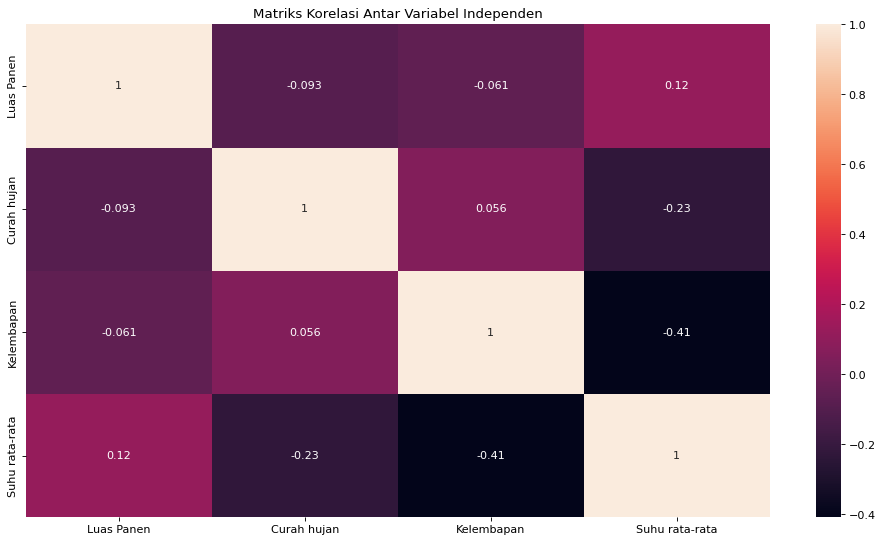

In [34]:
#checking multicollinearity
fig, ax = plt.subplots(figsize=(15,8), dpi=80)
sns.heatmap(df.loc[:, 'Luas Panen':'Suhu rata-rata'].corr(), cmap='rocket', annot=True)
plt.title('Matriks Korelasi Antar Variabel Independen')
plt.show()

In [35]:
#one hot encoding
from sklearn.preprocessing import OneHotEncoder
string_feat = ['Provinsi']
ohe = OneHotEncoder()
ohe.fit(df[string_feat])
data_ohe_res = pd.DataFrame(ohe.transform(df[string_feat]).toarray(),
                          columns=ohe.get_feature_names_out())
df = pd.concat([df, data_ohe_res], axis=1)
df = df.drop(columns=string_feat)
df.head()

,Tahun,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
0,1993,323589.0,1627.0,82.00,26.06,1329536.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1994,329041.0,1521.0,82.12,26.92,1299699.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1995,339253.0,1476.0,82.72,26.27,1382905.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1996,348223.0,1557.0,83.00,26.08,1419128.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1997,337561.0,1339.0,82.46,26.31,1368074.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df = df.drop(columns='Tahun')
df.tail()

,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Produksi,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
219,390799.00,2317.6,79.40,26.45,3831923.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
220,396559.00,1825.1,77.04,26.36,4090654.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
221,511940.93,1385.8,76.05,25.50,2488641.91,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
222,464103.42,1706.4,78.03,27.23,2164089.33,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
223,545149.05,2211.3,75.80,24.58,2604913.29,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [37]:
x = df.drop('Produksi',axis=1)
y = df[['Produksi']]

In [38]:
# Train and Test Split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

x_train : (156, 12)
x_test : (68, 12)
y_train : (156, 1)
y_test : (68, 1)


In [39]:
x_train[:5]

,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata,Provinsi_Aceh,Provinsi_Bengkulu,Provinsi_Jambi,Provinsi_Lampung,Provinsi_Riau,Provinsi_Sumatera Barat,Provinsi_Sumatera Selatan,Provinsi_Sumatera Utara
166,539316.52,1655.5,85.13,27.60,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40,822073.00,776.7,83.80,27.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13,320789.00,506.5,80.80,26.73,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122,159463.00,2508.1,71.28,29.39,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
89,126280.00,2233.0,84.26,26.73,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [40]:
y_test.tail()

,Produksi
186,502552.0
61,1807622.0
52,4669777.5
66,1823739.0
26,1714437.6


In [42]:
#Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
y_train = sc.fit_transform(y_train)
y_test = sc.fit_transform(y_test)

In [43]:
x_train[:5]

array([[ 7.16699915e-01, -8.39566916e-01,  9.37541781e-01,
         6.92312495e-01, -3.61157559e-01, -4.05190208e-01,
        -3.83482494e-01, -3.61157559e-01, -3.72405869e-01,
        -3.72405869e-01,  2.76887462e+00, -4.05190208e-01],
       [ 1.92735709e+00, -1.70505807e+00,  6.36262189e-01,
         2.09231762e-01, -3.61157559e-01, -4.05190208e-01,
        -3.83482494e-01, -3.61157559e-01, -3.72405869e-01,
        -3.72405869e-01, -3.61157559e-01,  2.46797672e+00],
       [-2.18952945e-01, -1.97116607e+00, -4.33158388e-02,
        -8.15456793e-03,  2.76887462e+00, -4.05190208e-01,
        -3.83482494e-01, -3.61157559e-01, -3.72405869e-01,
        -3.72405869e-01, -3.61157559e-01, -4.05190208e-01],
       [-9.09690355e-01,  1.21023610e-04, -2.19984345e+00,
         2.13350335e+00, -3.61157559e-01, -4.05190208e-01,
         2.60768096e+00, -3.61157559e-01, -3.72405869e-01,
        -3.72405869e-01, -3.61157559e-01, -4.05190208e-01],
       [-1.05176751e+00, -2.70812770e-01,  7.4046415

In [44]:
np.set_printoptions(suppress=True)
print(x_train[:5])
print(y_train[:5])

[[ 0.71669991 -0.83956692  0.93754178  0.69231249 -0.36115756 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587  2.76887462 -0.40519021]
 [ 1.92735709 -1.70505807  0.63626219  0.20923176 -0.36115756 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587 -0.36115756  2.46797672]
 [-0.21895294 -1.97116607 -0.04331584 -0.00815457  2.76887462 -0.40519021
  -0.38348249 -0.36115756 -0.37240587 -0.37240587 -0.36115756 -0.40519021]
 [-0.90969035  0.00012102 -2.19984345  2.13350335 -0.36115756 -0.40519021
   2.60768096 -0.36115756 -0.37240587 -0.37240587 -0.36115756 -0.40519021]
 [-1.05176751 -0.27081277  0.74046415 -0.00815457 -0.36115756 -0.40519021
  -0.38348249 -0.36115756  2.68524232 -0.37240587 -0.36115756 -0.40519021]]
[[ 0.77273334]
 [ 1.48736091]
 [-0.11743608]
 [-0.94191188]
 [-1.11821706]]


In [45]:
print(x_train.min())
print(x_train.max())

-3.6634654470384587
2.7688746209726918


In [46]:
print(y_train.min())
print(y_train.max())

-1.3819365029127002
2.7012953756267932


In [47]:
print(x_test[:5])
print(y_test[:5])

[[-1.07170771 -0.31302577  0.53326331 -0.34207301 -0.4152274  -0.31108551
  -0.36514837 -0.4152274   2.56038192 -0.39056673 -0.4152274  -0.31108551]
 [ 0.51064077 -0.79631917  0.34793546  1.18107828 -0.4152274  -0.31108551
  -0.36514837  2.40831892 -0.39056673 -0.39056673 -0.4152274  -0.31108551]
 [-1.2012385  -0.26857953  0.77401631 -1.18826817 -0.4152274   3.21455025
  -0.36514837 -0.4152274  -0.39056673 -0.39056673 -0.4152274  -0.31108551]
 [-1.23204632 -0.12562823  0.49169445 -0.30446434 -0.4152274  -0.31108551
   2.73861279 -0.4152274  -0.39056673 -0.39056673 -0.4152274  -0.31108551]
 [-1.11782994  0.78499627  0.58002828 -0.51131204 -0.4152274   3.21455025
  -0.36514837 -0.4152274  -0.39056673 -0.39056673 -0.4152274  -0.31108551]]
[[-1.11263695]
 [ 0.26419173]
 [-1.19391204]
 [-0.88288197]
 [-1.07069477]]


In [49]:
#MODELLING with Decision Tree Regression Algoritma

from sklearn.tree import DecisionTreeRegressor
DTreeReg = DecisionTreeRegressor(random_state = 0)
DTreeReg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [50]:
ypred_DTreeReg = sc.inverse_transform(DTreeReg.predict(x_test).reshape(-1,1))
y_pred_DTreeReg = pd.DataFrame(ypred_DTreeReg)
y_pred_DTreeReg.tail()

,0
63,4.256516e+05
64,1.916811e+06
65,1.826944e+06
66,1.827549e+06
67,2.392152e+06


<ipython-input-51-854f5cdf05a8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-51-854f5cdf05a8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred_DTreeReg,hist=False,label='Predicted')


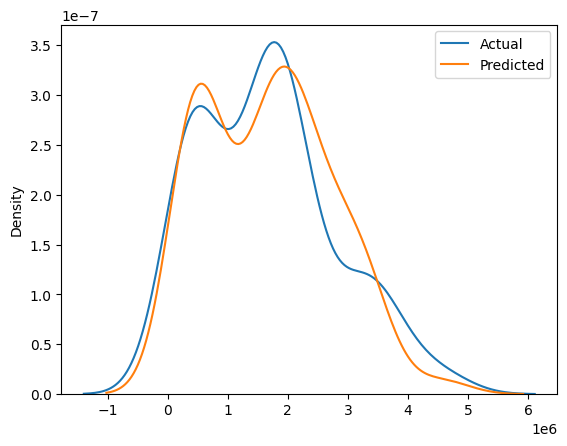

In [51]:
#visualisasi prediksi
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_DTreeReg,hist=False,label='Predicted')
plt.legend()

In [53]:
from sklearn.model_selection import KFold, cross_val_score

#Periksa keakuratan pengujian dan pelatihan model Regresi Pohon Keputusan
print('Decision Tree Regression')
DTreeReg_train = DTreeReg.score(x_train,y_train)*100
DTreeReg_test = DTreeReg.score(x_test, y_test)*100

#Menilai kinerja metode Regresi Pohon Keputusan dengan membagi data sampel sebanyak 10 kali lipat secara acak
DTreeReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
DTreeReg_score = cross_val_score(DTreeReg,x,y,cv=DTreeReg_cv)

print('Train : ',DTreeReg_train)
print('Test  : ',DTreeReg_test, '\n')
print('Rata-rata Skor Validasi Silang adalah',np.round(np.mean(DTreeReg_score)*100,2))

Decision Tree Regression
Train :  100.0
Test  :  73.21934331853251 

Rata-rata Skor Validasi Silang adalah 64.39


In [54]:
#Hyper parameter Tunning

DTreeReg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [56]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'splitter' : ['best', 'random'],
              'max_depth': np.arange(1,11),
              'min_samples_leaf': np.arange(1, 11),
              'min_samples_split': np.arange(2, 11),
              'max_features':['auto','log2','sqrt',None]}

DTreeReg_tuning = DecisionTreeRegressor()

DTreeReg_search = RandomizedSearchCV(DTreeReg_tuning, param_grid, cv = 10, scoring='r2')

DTreeReg_best_model = DTreeReg_search.fit(x_train, y_train)
print('Optimum parameters', DTreeReg_best_model.best_params_)
print('Best score is {}'.format(DTreeReg_best_model.best_score_))

Optimum parameters {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': 5}
Best score is 0.8240480506893405


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

In [57]:
#Fit New Model

DTreeReg_model = DecisionTreeRegressor(splitter= 'best', min_samples_split= 8, min_samples_leaf= 5, max_features= 'auto', max_depth= 2, random_state= 0)
DTreeReg_model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=2, max_features='auto', min_samples_leaf=5,
                      min_samples_split=8, random_state=0)

In [58]:
ypred_DTreeReg_model = sc.inverse_transform(DTreeReg_model.predict(x_test).reshape(-1,1))
ypred_DTreeReg_model = pd.DataFrame(ypred_DTreeReg_model)
ypred_DTreeReg_model.tail()

,0
63,4.849200e+05
64,1.966208e+06
65,1.966208e+06
66,1.966208e+06
67,1.966208e+06


<ipython-input-59-ea98c86190fb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
<ipython-input-59-ea98c86190fb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ypred_DTreeReg_model,hist=False,label='Predicted')


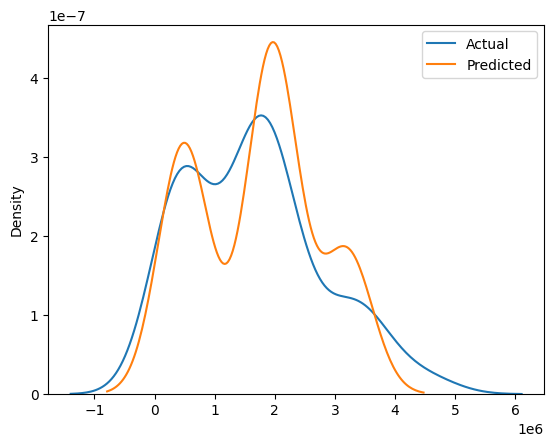

In [59]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_DTreeReg_model,hist=False,label='Predicted')
plt.legend()

In [60]:
#Check the accuracy of testing and training of the Decision Tree Regression model
print('Decision Tree Regression')
DTreeReg_model_train = DTreeReg_model.score(x_train,y_train)*100
DTreeReg_model_test = DTreeReg_model.score(x_test, y_test)*100

#Assess the performance of the Decision Tree Regression method by dividing the sample data by 10 folds randomly
DTreeReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
DTreeReg_model_score = cross_val_score(DTreeReg_model,x,y,cv=DTreeReg_model_cv)

print('Train : ',DTreeReg_model_train)
print('Test  : ',DTreeReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(DTreeReg_model_score)*100,2))

Decision Tree Regression
Train :  84.68468800789897
Test  :  81.42164309777542 

The Average Cross Validation Score is 78.52


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di